In [1]:
#代价均为pycharm导入，将爬取的数据中摘出播放量，然后进行曲线图分析
import selenium.webdriver as wb
import time
import numpy as np
import csv
import re


def init_csv(filepath='test.csv'):
    headers = ['UP昵称', '会员等级', '会员类别', '关注', '粉丝', '获赞', '播放', '生日', '投稿']
    with open(filepath, 'w', newline='',encoding='utf-8')as f:
        f_csv = csv.writer(f)
        f_csv.writerow(headers)


def write_csv(filepath,datas):
    with open(filepath, 'a+', newline='',encoding='utf-8')as f:
        f_csv = csv.writer(f)
        f_csv.writerow(datas)

def read_uid(filepath):
    x=[]
    with open(filepath, 'r', newline='',encoding='utf-8')as f:
        csv_read = csv.reader(f)
        for line in csv_read:
            line[0]=re.findall('\d+',line[0])[0]
            x.append(line[0])
    return x



class Spider(object):

    def __init__(self, display=True) -> None:
        super().__init__()
        option = wb.ChromeOptions()
        # 忽略driver自身的警告|错误等输出
        option.add_experimental_option(
            'excludeSwitches', ['enable-logging'])
        # 禁用图片加载,加速爬取url等页面数据,图片数据待爬取url后由requests库实现
        # option.add_experimental_option(
        #     'prefs', {"profile.managed_default_content_settings.images": 2})
        if display == False:
            option.headless = True
            print('程序运行，设置为无窗口模式')


################    Chrome程序地址改这里  
        option.binary_location = r"C:\Users\DELL\AppData\Local\Google\Chrome\Application\chrome.exe"
        # 浏览器驱动器初始化，需指明路径与参数
################    Chrome驱动器地址改这里，改try里的那个就行
        try:
            self.driver = wb.Chrome(
                r"C:\Users\DELL\Downloads\chromedriver_win32\chromedriver.exe", options=option)
        except:
            self.driver = wb.Chrome(
                r"C:\Users\Ludy_Lab\Desktop\workspace\assets\chromedriver.exe", options=option)

    def login(self):
        self.driver.get('https://space.bilibili.com/'+'51896064')
        self.random_sleep(2)
        login_elm = self.driver.find_element_by_css_selector(
            '#internationalHeader > div > div > div.nav-user-center > div.user-con.logout > div:nth-child(1) > div > span > div > span')
        login_elm.click()
        wds = self.driver.window_handles
        self.driver.switch_to.window(wds[-1])
        self.random_sleep(2)
        username_elm: wb.remote.webdriver.WebElement = self.driver.find_element_by_css_selector(
            '#login-username')
        password_elm: wb.remote.webdriver.WebElement = self.driver.find_element_by_css_selector(
            '#login-passwd')
        login2_elm: wb.remote.webdriver.WebElement = self.driver.find_element_by_css_selector(
            '#geetest-wrap > div > div.btn-box > a.btn.btn-login')


################################
        #账号密码改这里
        username_elm.send_keys('18392870510')
        password_elm.send_keys('han980510')
        self.random_sleep(1)
        login2_elm.click()
        # 8秒的时间进行人机结合登录=_=
        time.sleep(8)

    def random_sleep(self, delay=3):
        tmp = np.random.random()
        time.sleep(delay*(tmp+0.5))

    def fetch_by_UID(self, UID='51896064'):
        self.driver.get('https://space.bilibili.com/'+UID)
        self.random_sleep(3)

        up_name_elm = self.driver.find_element_by_css_selector('#h-name')
        print(up_name_elm.text)
        up_name = up_name_elm.text

        up_level_elm: wb.remote.webdriver.WebElement = self.driver.find_element_by_css_selector(
            '#app > div.h > div.wrapper > div.h-inner > div.h-user > div > div.h-basic > div:nth-child(1) > a.h-level.m-level')
        print(up_level_elm.get_attribute('lvl'))
        up_level = up_level_elm.get_attribute('lvl')

        up_member_elm = self.driver.find_element_by_css_selector(
            '#app > div.h > div.wrapper > div.h-inner > div.h-user > div > div.h-basic > div:nth-child(1) > a.h-vipType')
        print(up_member_elm.text)
        up_member = up_member_elm.text

        up_follow_elm = self.driver.find_element_by_css_selector('#n-gz')
        print(up_follow_elm.text)
        up_follow = up_follow_elm.text

        up_followby_elm = self.driver.find_element_by_css_selector('#n-fs')
        print(up_followby_elm.text)
        up_followby = up_followby_elm.text

        up_getzan_elm = self.driver.find_element_by_css_selector('#n-bf')
        print(up_getzan_elm.text)
        up_getzan = up_getzan_elm.text

        up_numofplay_elm = self.driver.find_element_by_xpath(
            '/html/body/div[2]/div[2]/div/div[1]/div[3]/div[2]/p[2]')
        print(up_numofplay_elm.text)
        up_numofplay = up_numofplay_elm.text

        birthday = 'None'
        try:
            birthday = self.driver.find_element_by_css_selector(
                '#page-index > div.col-2 > div.section.user > div.info > div.content > div > div > div.item.birthday > span.text').text
        except:
            pass
        print(birthday)

        up_tougao_elm = self.driver.find_element_by_css_selector(
            '#navigator > div > div.n-inner.clearfix > div.n-tab-links > a.n-btn.n-video.n-audio.n-article.n-album > span.n-num').text
        tougao = up_tougao_elm
        xiangbu = 'Error'
        try:
            up_tougao_elm = self.driver.find_element_by_xpath(
                '//*[@id="navigator"]/div/div[1]/div[1]/a[3]/span[2]')
            up_tougao_elm.click()
            self.random_sleep(3)
            up_xiangbu_elm = self.driver.find_element_by_css_selector(
                '#page-video > div > div.contribution-sidenav > div > div > ul > li:nth-child(4) > span')
            xiangbu = up_xiangbu_elm.text
        except:
            pass
        if xiangbu != 'Error':
            tougao = str(int(tougao)-int(xiangbu))
        print(tougao)
        self.random_sleep(2)
        return (up_name, up_level, up_member, up_follow, up_followby, up_getzan, up_numofplay, birthday, tougao)



if __name__ == "__main__":
    #用来保存爬虫结果的文件是下面这个，可以不新建
    csv_path = r'.\bilibli_ups2.csv'
    #用来读取UID列表的csv文件是这个，excel要先另存为成csv，并且不要有标题行
    uid_path = r'.\UID100.csv'
    uid_list = read_uid(uid_path)
    worker = Spider(display=True)   
    try:
        worker.login()
    except:
        print('登录失败')
        time.sleep(10)
        exit()
    
    try:
        init_csv(csv_path)
    except:
        pass
    
    for i in range(len(uid_list)):
        try:
            write_csv(csv_path,worker.fetch_by_UID(uid_list[i]))
            print('*'*20+'\n',i,'success')
        except:
            print(i,'error')
    time.sleep(10)
    # worker.random_sleep()


爱做饭的芋头SAMA
6

254
368.9万
1048.6万
1.6亿
09-25
121
********************
 0 success
啊吗粽
6
年度大会员
202
344.7万
2450.1万
2.6亿
05-28
200
********************
 1 success
79471674218_bili
0

3
0
0
0
None
0
********************
 2 success
波桑吃遍世界
6

117
139.6万
653.3万
1.1亿
07-30
159
********************
 3 success
宝剑嫂
6
年度大会员
377
335.5万
1864.2万
2亿
07-08
192
********************
 4 success
长歌与小见见
6
年度大会员
77
208.1万
1259.2万
5亿
07-07
5 error
-纯黑-
6
年度大会员
0
326.5万
654.2万
3.7亿
None
469
********************
 6 success
吃货请闭眼
6

68
177.1万
834.5万
2.2亿
None
360
********************
 7 success
吃货明3
6
年度大会员
142
132.3万
550万
2.8亿
None
829
********************
 8 success
潮汕好男人
6
年度大会员
165
160.8万
898万
1.9亿
None
171
********************
 9 success
嘟督不噶油
6
年度大会员
162
282.5万
1288万
2.8亿
None
342
********************
 10 success
逗川kshadow
6
年度大会员
56
169.6万
515.6万
1.7亿
08-23
249
********************
 11 success
东尼ookii
6
年度大会员
151
346.6万
2942.3万
3.3亿
None
173
********************
 12 success
电影最TOP
6

23
339.2万
783.5万
2.7亿
0

In [16]:
#将所有显示success的数据输入Excel文档中，然后进行数据分析
# coding:utf-8
#导入读取Excel的库
import csv
import pandas as pd
#导入需要读取Excel表格的路径
data = pd.read_csv(r'bilibli_ups2.csv')
r = mlab.csv2rec('D:/python/pj4/data/bug_trend.csv')
r.sort()
table = data.values.sheets()[0]
y=''
#将列的值存入字符串
y=table.col_values(5)#读取列的值
#导入pyechats库
from pyecharts import Bar
import numpy as np
t=np.linspace(1,88,len(y))#等间隔取值
bar=Bar("文章阅读量展示","统计如下")#主副标题
bar.add("博客文章阅读量折线图展示",t,y,is_more_utils=True)#标题

AttributeError: 'numpy.ndarray' object has no attribute 'sheets'

<AxesSubplot:>

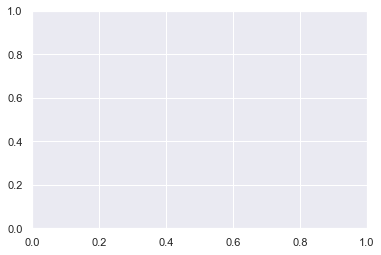

In [19]:
import seaborn as sns
import pandas as pd
sns.set_theme(style="darkgrid")
# Samuel Norman Seaborn is a fictional character portrayed 
# by Rob Lowe on the television serial drama The West Wing. 
fs = pd.read_csv("bilibli_ups2.csv")
sns.kdeplot(data=penguins, x="粉丝")

In [57]:
import csv
with open( 'bilibli_ups2.csv', 'rb') as csvfile:
    reader = csv.reader(csvfile)
column = [row[ 2] for row in reader]
print (column)

ValueError: readline of closed file

In [52]:
import json
import pandas as pd

# 所需列名和新老列名映射关系
columns_json_str = '{"name":"NEW_NAME","src":"NEW_SRC"}'
columns_dict = json.loads(columns_json_str)

# 读取本地文件
dataset = pd.read_csv('bilibli_ups2.csv', header=0, encoding='utf-8', dtype=str)
df = pd.DataFrame(dataset, columns=columns_dict.keys())

# 列名重命名
# df.rename(columns={'name':'NEW_NAME', 'src':'NEW_SRC'}, inplace=True) 
df.rename(columns=columns_dict, inplace=True) 
print(df)

# 将重命名之后的数据写入到文件
filepath = 'new_movies.csv'
df_columns = pd.DataFrame([list(df.columns)])
df_columns.to_csv(filepath, mode='w', header=False, index=0) 

df.to_csv(filepath, mode='a', header=False, index=0)

Empty DataFrame
Columns: [NEW_NAME, NEW_SRC]
Index: []


In [58]:
>>> import pandas as pd 

>>> import numpy as np

>>> from scipy import interpolate

>>> df= pd.read_csv("bilibli_ups2.csv",header=False)

>>> z = []

for row in df:

    z.append(row)



TypeError: Passing a bool to header is invalid. Use header=None for no header or header=int or list-like of ints to specify the row(s) making up the column names

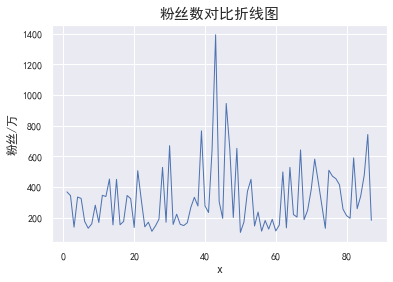

In [63]:
import matplotlib.pyplot as plt
fensi=[368.9,344.7,139.6,335.5,326.5,177.1,132.3,160.8,282.5,169.6,346.6,339.2,452.7,154.2,450.8,154.9,176.6,345.8,325,137.4,507,317.5,141.4,171.6,112.3,147.3,191.5,528.6,171.5,670.1,157.1,223.8,157.9,149.7,168.3,268.1,333.9,277.3,766.6,277.6,234.9,642.4,1392.6,306.2,196.8,944.9,652.3,202.3,652.5,105.1,172.5,372.7,451,147,237.8,113.5,182.8,126.6,190.4,114.6,153.5,499.2,134.5,528.7,221.3,205,642.3,188.5,249.1,382.4,582.6,435.4,284,131.7,510,471.8,454.5,415.7,256.1,214.7,197.1,590.6,259.8,341.9,478.8,743,184]
import numpy as np
x=np.arange(1, 88, 1)
# 设置线宽
plt.plot(x, fensi, linewidth=1)
from pylab import *
mpl.rcParams['font.sans-serif']=['SimHei']
# 设置图表标题，并给坐标轴添加标签
plt.title("粉丝数对比折线图", 
fontsize=15)
plt.xlabel("up序号", fontsize=12)
plt.ylabel("粉丝/万", fontsize=12)

# 设置坐标轴刻度标记的大小
plt.tick_params(axis='both', 
labelsize=10)
plt.show()

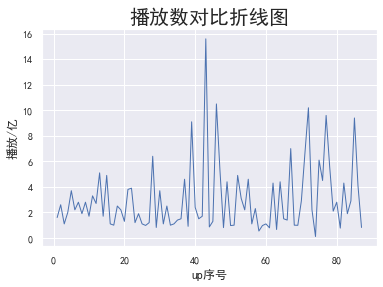

In [65]:
import matplotlib.pyplot as plt
fensi=[1.6,2.6,1.1,2,3.7,2.2,2.8,1.9,2.8,1.7,3.3,2.7,5.1,1.7,4.9,1.1,1,2.5,2.2,1.3,3.8,3.9,1.2,1.9,1.1,0.98,1.2,6.4,0.82,3.7,1.1,2.5,1,1.1,1.4,1.5,4.6,0.91,9.1,2.4,1.5,1.7,15.6,0.86,1.3,10.5,5.3,0.81,4.4,0.97,1,4.9,3.1,2.2,4.6,1.1,2.3,0.54,0.97,1.1,0.79,4.3,0.66,4.4,1.5,1.4,7,1,0.99,2.9,6.6,10.2,2.2,0.11,6.1,4.5,9.6,5.6,2.1,2.8,0.77,4.3,1.9,2.9,9.4,4.1,0.82]
import numpy as np
x=np.arange(1, 88, 1)
# 设置线宽
plt.plot(x, fensi, linewidth=1)
from pylab import *
mpl.rcParams['font.sans-serif']=['SimHei']
# 设置图表标题，并给坐标轴添加标签
plt.title("播放数对比折线图", 
fontsize=20)
plt.xlabel("up序号", fontsize=12)
plt.ylabel("播放/亿", fontsize=12)

# 设置坐标轴刻度标记的大小
plt.tick_params(axis='both', 
labelsize=10)
plt.show()

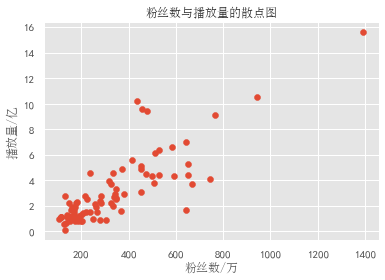

In [68]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=12) 
x = [368.9,344.7,139.6,335.5,326.5,177.1,132.3,160.8,282.5,169.6,346.6,339.2,452.7,154.2,450.8,154.9,176.6,345.8,325,137.4,507,317.5,141.4,171.6,112.3,147.3,191.5,528.6,171.5,670.1,157.1,223.8,157.9,149.7,168.3,268.1,333.9,277.3,766.6,277.6,234.9,642.4,1392.6,306.2,196.8,944.9,652.3,202.3,652.5,105.1,172.5,372.7,451,147,237.8,113.5,182.8,126.6,190.4,114.6,153.5,499.2,134.5,528.7,221.3,205,642.3,188.5,249.1,382.4,582.6,435.4,284,131.7,510,471.8,454.5,415.7,256.1,214.7,197.1,590.6,259.8,341.9,478.8,743,184]
y = [1.6,2.6,1.1,2,3.7,2.2,2.8,1.9,2.8,1.7,3.3,2.7,5.1,1.7,4.9,1.1,1,2.5,2.2,1.3,3.8,3.9,1.2,1.9,1.1,0.98,1.2,6.4,0.82,3.7,1.1,2.5,1,1.1,1.4,1.5,4.6,0.91,9.1,2.4,1.5,1.7,15.6,0.86,1.3,10.5,5.3,0.81,4.4,0.97,1,4.9,3.1,2.2,4.6,1.1,2.3,0.54,0.97,1.1,0.79,4.3,0.66,4.4,1.5,1.4,7,1,0.99,2.9,6.6,10.2,2.2,0.11,6.1,4.5,9.6,5.6,2.1,2.8,0.77,4.3,1.9,2.9,9.4,4.1,0.82]
plt.scatter(x, y)
plt.xlabel('粉丝数/万',fontproperties = font)
plt.ylabel("播放量/亿",fontproperties = font)
plt.title('粉丝数与播放量的散点图',fontproperties = font)
plt.show()

In [80]:
import numpy as np
from sklearn.linear_model import LinearRegression
x_in = np.array(x).reshape(-1,1)
y_in = np.array(y).reshape(-1,1)
lreg = LinearRegression()
lreg.fit(x_in, y_in)
y_prd = lreg.predict(x_in)

def get_lr_stats(x, y, model):
    """
    revise: 2020-08-10
    sigma =  np.sqrt(Residual / n)  -->>
    sigma =  np.sqrt(Residual / (n-2)) 
    """
    message0 = f'一元线性回归方程为: \ty={model.intercept_[0]:.3f} + {model.coef_[0][0]:.3f}*x'
    from scipy import stats
    n     = len(x)
    y_prd = model.predict(x)
    Regression = sum((y_prd - np.mean(y))**2) # 回归
    Residual   = sum((y - y_prd)**2)          # 残差
    R_square   = Regression / (Regression + Residual) # 相关性系数R^2
    F          = (Regression / 1) / (Residual / ( n - 2 ))  # F 分布
    pf         = stats.f.sf(F, 1, n-2)
    message1 = (f'相关系数(R^2): {R_square[0]:.3f};\n' + 
                f'回归分析(SSR): {Regression[0]:.3f};\t残差(SSE)：{Residual[0]:.3f};\n' + 
                f'           F : {F[0]:.3f};\tpf : {pf[0]}')
    ## T
    L_xx  =  n * np.var(x)
    sigma =  np.sqrt(Residual / (n-2)) 
    t     =  model.coef_ * np.sqrt(L_xx) / sigma
    pt    =  stats.t.sf(t, n-2)
    message2 = f'           t : {t[0][0]:.3f};\tpt : {pt[0][0]}'
    return print(message0 +'\n' +message1 + '\n'+message2)

get_lr_stats(x_in, y_in, lreg)

IndexError: invalid index to scalar variable.

In [81]:
from statsmodels.formula.api import ols
import pandas as pd
data = pd.DataFrame({'x':x, 'y':y})
model = ols('y~x', data).fit()
print(model.summary())
#线性回归分析

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     192.4
Date:                Sun, 24 Jan 2021   Prob (F-statistic):           1.51e-23
Time:                        17:50:51   Log-Likelihood:                -158.27
No. Observations:                  87   AIC:                             320.5
Df Residuals:                      85   BIC:                             325.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3912      0.294     -1.330      0.1

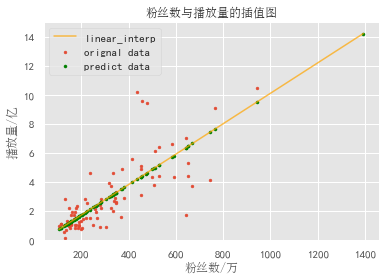

In [84]:
from scipy.interpolate import interp1d # 进行插值画图
linear_interp = interp1d(x, y_prd.transpose()[0], kind='linear')
computed = np.linspace(min(x),max(x) , 50)
linear_results = linear_interp(computed)  

plt.scatter(x, y,s = 8, label = 'orignal data')
plt.scatter(x_in, y_prd,c = 'green', s = 9 ,  label = 'predict data')
plt.plot(computed, linear_results , label = 'linear_interp', alpha = 0.7, c = 'orange')
plt.xlabel('粉丝数/万',fontproperties = font)
plt.ylabel("播放量/亿",fontproperties = font)
plt.title('粉丝数与播放量的插值图',fontproperties = font)
plt.ylim(0,15)
plt.legend(loc = 'upper left')
plt.show()